In [7]:
import ast
import numpy as np
import datetime
from dateutil.tz import tzutc


with open("prams.txt", "r") as f:
    device_params = eval(f.read(), {
        "array": np.array,
        "datetime": datetime,
        "tzutc": tzutc
    })
  # safe way to parse the dict

# Extract values
T1_list = device_params['T1']
T2_list = device_params['T2']
p_list = device_params['p']
tg_matrix = device_params['t_int']  # 2D array of gate times between qubits

# Example: print values for the first 4 qubits
for i in range(4):
    print(f"Qubit {i}: T1 = {T1_list[i]:.2e} s, T2 = {T2_list[i]:.2e} s, p = {p_list[i]:.2e}")

# Example: print gate time between qubit 1 and 2
print(f"Gate time tg between qubit 1 and 2: {tg_matrix[1][2]:.2e} s")


Qubit 0: T1 = 3.87e-04 s, T2 = 3.26e-04 s, p = 2.51e-04
Qubit 1: T1 = 3.06e-04 s, T2 = 3.98e-04 s, p = 2.30e-04
Qubit 2: T1 = 2.60e-04 s, T2 = 2.00e-04 s, p = 1.79e-04
Qubit 3: T1 = 3.73e-04 s, T2 = 3.36e-04 s, p = 2.31e-04
Gate time tg between qubit 1 and 2: 5.33e-07 s


In [7]:
import ast
import numpy as np
import datetime
from dateutil.tz import tzutc
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")
props = backend.properties()


estimated_1q_gate_time = props.gate_length('x', [0])


# Read the parameter file
with open("prams.txt", "r") as f:
    device_params = eval(f.read(), {
        "array": np.array,
        "datetime": datetime,
        "tzutc": tzutc
    })

# Extract relevant data
T1 = device_params['T1']
T2 = device_params['T2']
p = device_params['p']
tm = device_params['tm']  # Measurement times per qubit
tg = device_params['t_int']  # Two-qubit gate durations
dt = device_params['dt'][0]  # Backend clock resolution

print("T1:", T1)
print("T2:", T2)
print("p:", p)
print("tm:", tm)
print("tg:", tg)



# Average single-qubit gate time
avg_1q_gate_time = estimated_1q_gate_time

# Collect actual 2-qubit gate durations
two_qubit_gate_times = [tg[i][j] for i in range(len(tg)) for j in range(len(tg[i])) if tg[i][j] > 0]
avg_2q_gate_time = np.mean(two_qubit_gate_times) if two_qubit_gate_times else 0

print("\n\nAverage single-qubit gate time:", avg_1q_gate_time, "seconds")
print("Average two-qubit gate time:", avg_2q_gate_time, "seconds")
# For single-qubit gates
#print("SX duration on qubit 0:", props.gate_length('sx', [0]), "seconds")
#print("X duration on qubit 0:", props.gate_length('x', [0]), "seconds")

# Measurement durations
avg_measurement_time = np.mean(tm)

print('\nAverage measurement time:', avg_measurement_time, "seconds")


C:\Users\npace\AppData\Local\Temp\ipykernel_51820\1576074614.py:7: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


T1: [0.0003871348610122443, 0.0003063573838660812, 0.0002603211878308971, 0.00037343826029424544]
T2: [0.0003255916093892485, 0.0003982742356218155, 0.00020049666129986815, 0.00033551901389705587]
p: [0.00025149274877471733, 0.00023015904786261227, 0.00017871478265339173, 0.0002307749574494199]
tm: [1.216e-06, 1.216e-06, 1.216e-06, 1.216e-06]
tg: [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.33333333e-07 0.00000000e+00 5.33333333e-07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.33333333e-07 0.00000000e+00]]


Average single-qubit gate time: 5.6888888888888887e-08 seconds
Average two-qubit gate time: 5.33333333e-07 seconds

Average measurement time: 1.216e-06 seconds


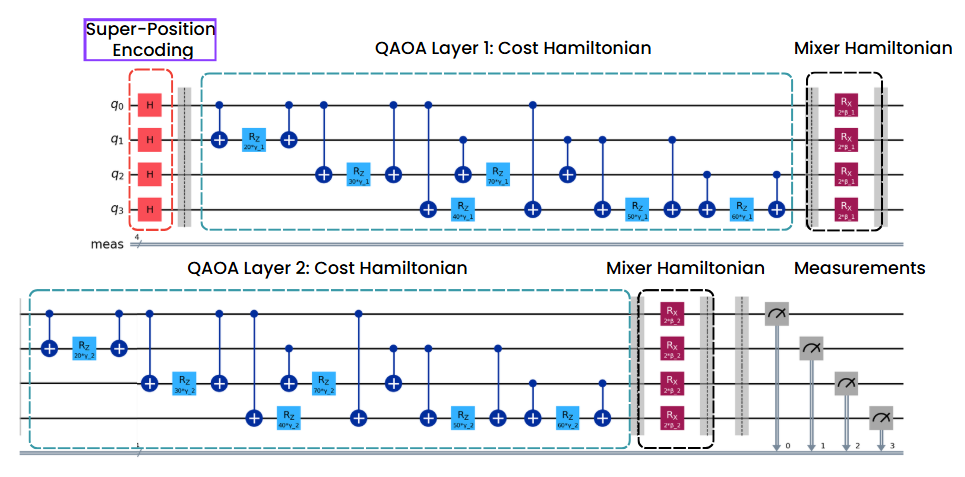

In [22]:
num_qubits = 4
num_cycles = 2

num_steps = 200
num_shots = 1

print("\n\nNumber of qubits:", num_qubits)
print("Number of cycles:", num_cycles)
print("Number of steps:", num_steps)
print("Number of shots:", num_shots)

num_h_gates = num_qubits 
num_measurements = num_qubits
num_Rx_gates = num_qubits
num_edges = num_qubits * (num_qubits - 1) / 2
num_Rz_gates = num_edges
num_CNOT_gates = num_edges*2

print("\n\nNumber of gates:")
print("Number of H gates:", num_h_gates)
print("Number of measurements:", num_measurements)
print("Number of Rx gates:", num_Rx_gates)
print("Number of edges:", num_edges)
print("Number of Rz gates:", num_Rz_gates)
print("Number of CNOT gates:", num_CNOT_gates)

num_1q_gates = num_h_gates + num_Rx_gates + num_Rz_gates
num_2q_gates = num_CNOT_gates

total_1q_gates = num_1q_gates * num_cycles
total_2q_gates = num_2q_gates * num_cycles
total_measurements = num_measurements




Number of qubits: 4
Number of cycles: 2
Number of steps: 200
Number of shots: 1


Number of gates:
Number of H gates: 4
Number of measurements: 4
Number of Rx gates: 4
Number of edges: 6.0
Number of Rz gates: 6.0
Number of CNOT gates: 12.0


In [23]:
# Estimate energy use for one execution (assume circuit has 20 1Q, 10 2Q, and 4 measurements)
gate_counts = {'1q': total_1q_gates, '2q': total_2q_gates, 'meas': num_measurements}
total_time_sec = (avg_1q_gate_time * gate_counts['1q'] +
                  avg_2q_gate_time * gate_counts['2q'] +
                  avg_measurement_time * gate_counts['meas'])

# Estimate energy consumption (assume 25 kW draw)
power_kw = 25
energy_kwh = (total_time_sec / 3600) * power_kw

print("energy for one execution:", energy_kwh, "kWh")
print(
    "avg_1q_gate_time_sec", avg_1q_gate_time,
    "\navg_2q_gate_time_sec", avg_2q_gate_time,
    "\navg_measurement_time_sec", avg_measurement_time,
    "\nestimated_total_time_sec", total_time_sec,
    "\nestimated_energy_kwh", energy_kwh
)

iterations = num_steps*num_shots
total_time_many_calls = total_time_sec * iterations
total_energy_many_calls = (total_time_many_calls / 3600) * power_kw
print(
    "\n\n\n\n\n",
    'iterations', iterations,
    "\ntotal_time_many_calls_sec", total_time_many_calls,
    "\ntotal_energy_many_calls_kwh", total_energy_many_calls
)

total_energy_joules = total_energy_many_calls * 3600000
total_energy_joules


energy for one execution: 1.3372839500617285e-07 kWh
avg_1q_gate_time_sec 5.6888888888888887e-08 
avg_2q_gate_time_sec 5.33333333e-07 
avg_measurement_time_sec 1.216e-06 
estimated_total_time_sec 1.925688888088889e-05 
estimated_energy_kwh 1.3372839500617285e-07





 iterations 200 
total_time_many_calls_sec 0.003851377776177778 
total_energy_many_calls_kwh 2.674567900123457e-05


96.28444440444446

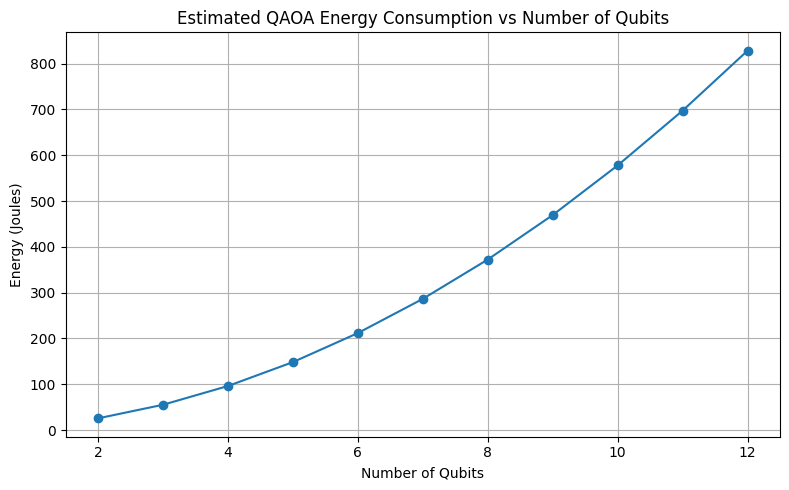

In [24]:
import matplotlib.pyplot as plt

# Parameters
num_layers = 2
num_steps = 200
num_shots = 1
power_kw = 25

# Use values from the previous real backend props
avg_1q_gate_time = estimated_1q_gate_time
avg_2q_gate_time = avg_2q_gate_time
avg_measurement_time = avg_measurement_time

# Store results
qubit_range = list(range(2, 13))  # from 2 to 12 qubits
energy_joules = []

for n in qubit_range:
    edges = n * (n - 1) / 2
    num_1q = num_layers * (n + n + edges)  # H + RX + RZ
    num_2q = num_layers * (2 * edges)  # 2 CNOTs per edge
    num_meas = n

    time_sec = (avg_1q_gate_time * num_1q +
                avg_2q_gate_time * num_2q +
                avg_measurement_time * num_meas)

    total_time = time_sec * num_steps * num_shots
    energy_kwh = (total_time / 3600) * power_kw
    energy_j = energy_kwh * 3.6e6
    energy_joules.append(energy_j)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(qubit_range, energy_joules, marker='o')
plt.title("Estimated QAOA Energy Consumption vs Number of Qubits")
plt.xlabel("Number of Qubits")
plt.ylabel("Energy (Joules)")
plt.grid(True)
plt.tight_layout()
plt.show()


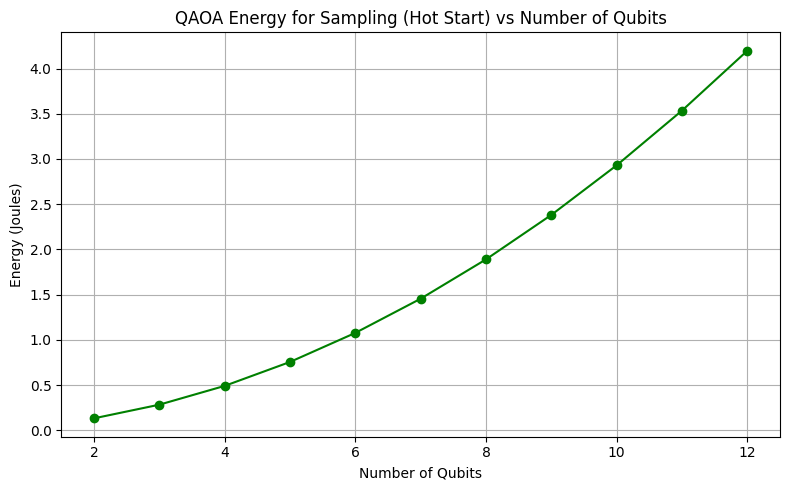

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Constants: gate durations based on IBM Sherbrooke calibration
avg_1q_gate_time = 7.0e-8        # 70 ns (example realistic 1-qubit gate)
avg_2q_gate_time = 5.33e-7       # 533 ns (from t_int)
avg_measurement_time = 1.216e-6  # 1.216 µs

# QAOA parameters (hot start: assume trained parameters)
num_layers = 2
num_runs = 1  # sampling only
power_kw = 25

# Simulate for a range of qubits
qubit_range = list(range(2, 13))  # from 2 to 12 qubits
energy_joules = []

for n in qubit_range:
    edges = n * (n - 1) / 2
    num_1q = num_layers * (n + n + edges)  # H + RX + RZ per layer
    num_2q = num_layers * (2 * edges)      # 2 CNOTs per edge per layer
    num_meas = n

    time_sec = (avg_1q_gate_time * num_1q +
                avg_2q_gate_time * num_2q +
                avg_measurement_time * num_meas)

    total_time = time_sec * num_runs
    energy_kwh = (total_time / 3600) * power_kw
    energy_j = energy_kwh * 3.6e6
    energy_joules.append(energy_j)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(qubit_range, energy_joules, marker='o', color='green')
plt.title("QAOA Energy for Sampling (Hot Start) vs Number of Qubits")
plt.xlabel("Number of Qubits")
plt.ylabel("Energy (Joules)")
plt.grid(True)
plt.tight_layout()
plt.show()


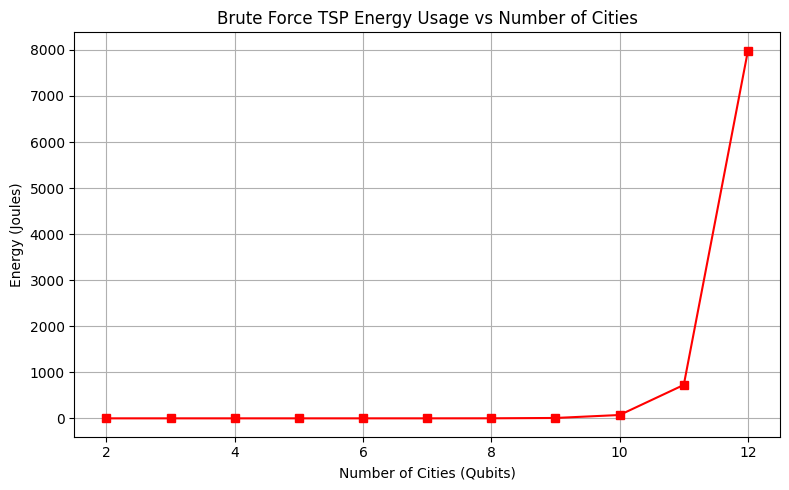

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from math import factorial

# Brute force TSP requires checking all permutations of n cities (except the starting point fixed)
# For n cities: (n-1)! paths
# Assume energy per classical check is small but non-zero and additive

# Constants
power_kw = 0.2  # assume 200W desktop-class CPU power draw
energy_joules = []

# Duration per path check (simulate algorithm time in seconds)
# Assume each check takes ~1 microsecond (very optimistic)
check_time_sec = 1e-6

# Simulate energy usage for brute force TSP
qubit_range = list(range(2, 13))  # same as QAOA range

for n in qubit_range:
    num_paths = factorial(n - 1)
    total_time = check_time_sec * num_paths  # total time for checking all paths
    energy_kwh = (total_time / 3600) * power_kw
    energy_j = energy_kwh * 3.6e6
    energy_joules.append(energy_j)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(qubit_range, energy_joules, marker='s', color='red')
plt.title("Brute Force TSP Energy Usage vs Number of Cities")
plt.xlabel("Number of Cities (Qubits)")
plt.ylabel("Energy (Joules)")
plt.grid(True)
plt.tight_layout()
plt.show()


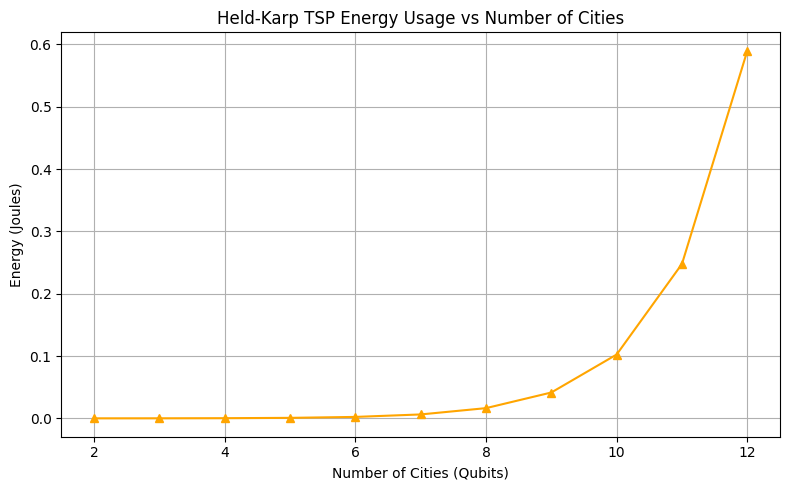

In [28]:
# Held-Karp algorithm (dynamic programming TSP)
# Time complexity: O(n^2 * 2^n), Space: O(n * 2^n)
# We'll simulate total operation count and assign a time per operation

# Constants
power_kw = 0.2  # assume 200W power draw for classical machine
operation_time_sec = 5e-9  # 5 ns per operation (200 MHz equivalent)
energy_joules = []

# Use same qubit range
qubit_range = list(range(2, 13))

for n in qubit_range:
    num_operations = (n ** 2) * (2 ** n)
    total_time = num_operations * operation_time_sec
    energy_kwh = (total_time / 3600) * power_kw
    energy_j = energy_kwh * 3.6e6
    energy_joules.append(energy_j)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(qubit_range, energy_joules, marker='^', color='orange')
plt.title("Held-Karp TSP Energy Usage vs Number of Cities")
plt.xlabel("Number of Cities (Qubits)")
plt.ylabel("Energy (Joules)")
plt.grid(True)
plt.tight_layout()
plt.show()


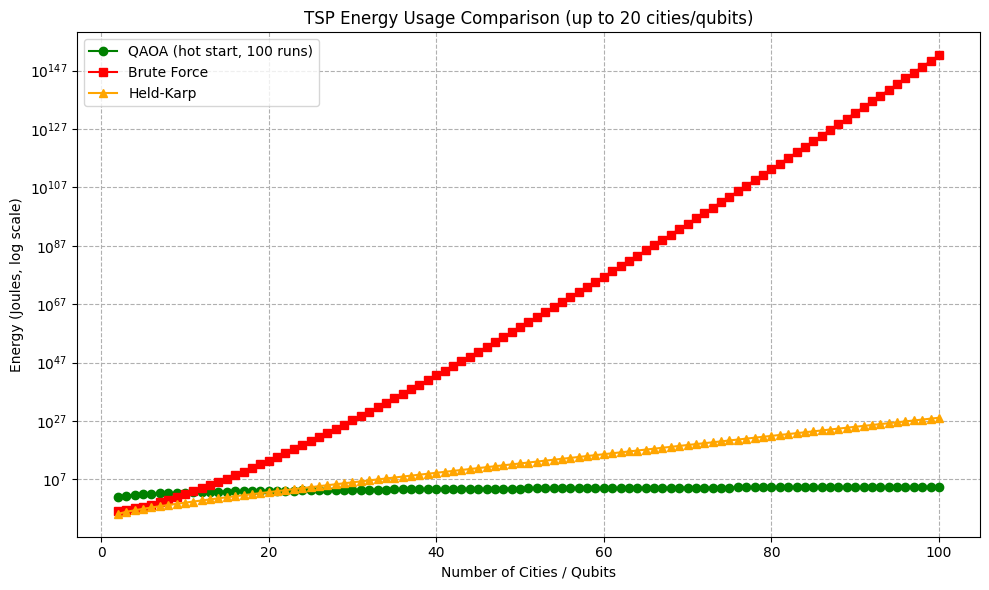

In [ ]:
# Extended range up to 20 nodes
qubit_range = list(range(2, 101))

# Constants
power_kw_qpu = 25         # QPU power draw
power_kw_cpu = 0.2        # Classical CPU power draw

# Gate times (from IBM Sherbrooke calibration)
avg_1q_gate_time = 7.0e-8
avg_2q_gate_time = 5.33e-7
avg_measurement_time = 1.216e-6

# QAOA (hot start) sampling: 100 runs
num_layers = 2
qaoa_runs = 100
qaoa_energy_j = []

# Brute-force: 1 µs per permutation
check_time_sec = 1e-6
brute_energy_j = []

# Held-Karp: O(n^2 * 2^n), 5 ns per op
operation_time_sec = 5e-9
heldkarp_energy_j = []

for n in qubit_range:
    # Fully connected graph
    edges = n * (n - 1) / 2

    # --- QAOA ---
    num_1q = num_layers * (n + n + edges)  # H, RX, RZ
    num_2q = num_layers * (2 * edges)      # CNOTs
    num_meas = n

    time_sec = (avg_1q_gate_time * num_1q +
                avg_2q_gate_time * num_2q +
                avg_measurement_time * num_meas)
    total_time_qaoa = time_sec * qaoa_runs
    energy_kwh_qaoa = (total_time_qaoa / 3600) * power_kw_qpu
    qaoa_energy_j.append(energy_kwh_qaoa * 3.6e6)

    # --- Brute Force ---
    try:
        num_paths = factorial(n - 1)
        total_time_brute = check_time_sec * num_paths
        energy_kwh_brute = (total_time_brute / 3600) * power_kw_cpu
        brute_energy_j.append(energy_kwh_brute * 3.6e6)
    except OverflowError:
        brute_energy_j.append(np.nan)

    # --- Held-Karp ---
    num_operations = (n ** 2) * (2 ** n)
    total_time_held = num_operations * operation_time_sec
    energy_kwh_held = (total_time_held / 3600) * power_kw_cpu
    heldkarp_energy_j.append(energy_kwh_held * 3.6e6)

# Plotting all three
plt.figure(figsize=(10, 6))
plt.plot(qubit_range, qaoa_energy_j, marker='o', label='QAOA (hot start, 100 runs)', color='green')
plt.plot(qubit_range, brute_energy_j, marker='s', label='Brute Force', color='red')
plt.plot(qubit_range, heldkarp_energy_j, marker='^', label='Held-Karp', color='orange')

plt.yscale('log')
plt.title("TSP Energy Usage Comparison (up to 100 cities/qubits)")
plt.xlabel("Number of Cities / Qubits")
plt.ylabel("Energy (Joules, log scale)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()


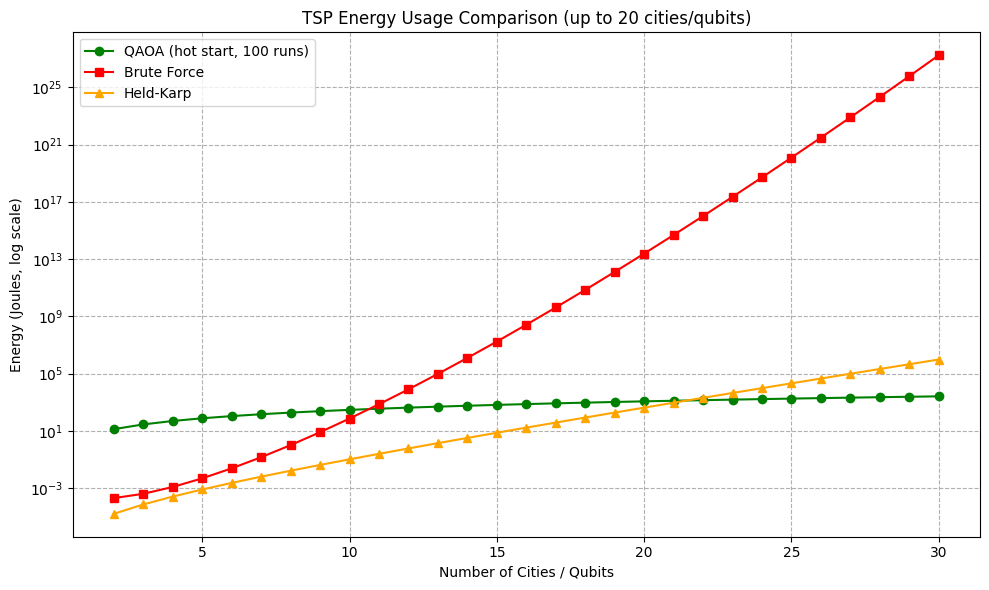

In [ ]:
# Extended range up to 20 nodes
qubit_range = list(range(2, 31))

# Constants
power_kw_qpu = 25         # QPU power draw
power_kw_cpu = 0.2        # Classical CPU power draw

# Gate times (from IBM Sherbrooke calibration)
avg_1q_gate_time = 7.0e-8
avg_2q_gate_time = 5.33e-7
avg_measurement_time = 1.216e-6

# QAOA (hot start) sampling: 100 runs
num_layers = 2
qaoa_runs = 100
qaoa_energy_j = []

# Brute-force: 1 µs per permutation
check_time_sec = 1e-6
brute_energy_j = []

# Held-Karp: O(n^2 * 2^n), 5 ns per op
operation_time_sec = 5e-9
heldkarp_energy_j = []

for n in qubit_range:
    # Fully connected graph
    edges = n * (n - 1) / 2

    # --- QAOA ---
    num_1q = num_layers * (n + n + edges)  # H, RX, RZ
    num_2q = num_layers * (2 * edges)      # CNOTs
    num_meas = n

    time_sec = (avg_1q_gate_time * num_1q +
                avg_2q_gate_time * num_2q +
                avg_measurement_time * num_meas)
    total_time_qaoa = time_sec * qaoa_runs
    energy_kwh_qaoa = (total_time_qaoa / 3600) * power_kw_qpu
    qaoa_energy_j.append(energy_kwh_qaoa * 3.6e6)

    # --- Brute Force ---
    try:
        num_paths = factorial(n - 1)
        total_time_brute = check_time_sec * num_paths
        energy_kwh_brute = (total_time_brute / 3600) * power_kw_cpu
        brute_energy_j.append(energy_kwh_brute * 3.6e6)
    except OverflowError:
        brute_energy_j.append(np.nan)

    # --- Held-Karp ---
    num_operations = (n ** 2) * (2 ** n)
    total_time_held = num_operations * operation_time_sec
    energy_kwh_held = (total_time_held / 3600) * power_kw_cpu
    heldkarp_energy_j.append(energy_kwh_held * 3.6e6)

# Plotting all three
plt.figure(figsize=(10, 6))
plt.plot(qubit_range, qaoa_energy_j, marker='o', label='QAOA (hot start, 100 runs)', color='green')
plt.plot(qubit_range, brute_energy_j, marker='s', label='Brute Force', color='red')
plt.plot(qubit_range, heldkarp_energy_j, marker='^', label='Held-Karp', color='orange')

plt.yscale('log')
plt.title("TSP Energy Usage Comparison (up to 30 cities/qubits)")
plt.xlabel("Number of Cities / Qubits")
plt.ylabel("Energy (Joules, log scale)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()


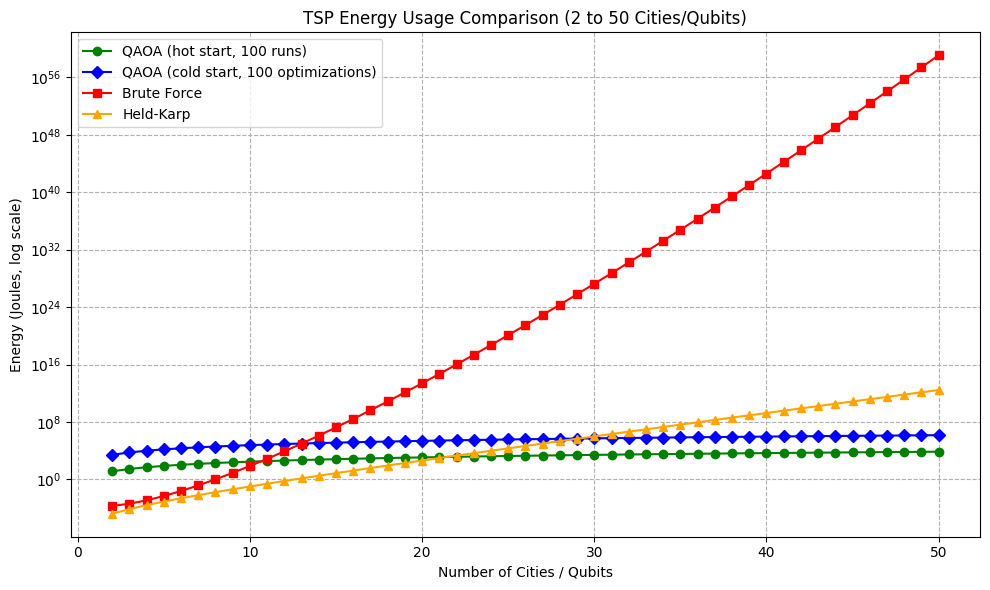

In [40]:
# Extend Held-Karp and Brute Force energy lists to match the extended qubit range (2 to 30)
from math import factorial

# Extend range
qubit_range = list(range(2, 51))

# Recalculate QAOA (hot start)
qaoa_energy_j = []
qaoa_energy_cold_j = []
brute_energy_j = []
heldkarp_energy_j = []

for n in qubit_range:
    edges = n * (n - 1) / 2

    # --- QAOA HOT START ---
    num_1q = num_layers * (n + n + edges)  # H, RX, RZ
    num_2q = num_layers * (2 * edges)
    num_meas = n

    time_sec = (avg_1q_gate_time * num_1q +
                avg_2q_gate_time * num_2q +
                avg_measurement_time * num_meas)

    total_time_hot = time_sec * qaoa_runs
    energy_kwh_hot = (total_time_hot / 3600) * power_kw_qpu
    qaoa_energy_j.append(energy_kwh_hot * 3.6e6)

    # --- QAOA COLD START ---
    total_calls = qaoa_steps * qaoa_shots * qaoa_repeats
    total_time_cold = time_sec * total_calls
    energy_kwh_cold = (total_time_cold / 3600) * power_kw_qpu
    qaoa_energy_cold_j.append(energy_kwh_cold * 3.6e6)

    # --- BRUTE FORCE ---
    try:
        num_paths = factorial(n - 1)
        total_time_brute = check_time_sec * num_paths
        energy_kwh_brute = (total_time_brute / 3600) * power_kw_cpu
        brute_energy_j.append(energy_kwh_brute * 3.6e6)
    except OverflowError:
        brute_energy_j.append(np.nan)

    # --- HELD-KARP ---
    num_operations = (n ** 2) * (2 ** n)
    total_time_held = num_operations * operation_time_sec
    energy_kwh_held = (total_time_held / 3600) * power_kw_cpu
    heldkarp_energy_j.append(energy_kwh_held * 3.6e6)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(qubit_range, qaoa_energy_j, marker='o', label='QAOA (hot start, 100 runs)', color='green')
plt.plot(qubit_range, qaoa_energy_cold_j, marker='D', label='QAOA (cold start, 100 optimizations)', color='blue')
plt.plot(qubit_range, brute_energy_j, marker='s', label='Brute Force', color='red')
plt.plot(qubit_range, heldkarp_energy_j, marker='^', label='Held-Karp', color='orange')

plt.yscale('log')
plt.title("TSP Energy Usage Comparison (2 to 50 Cities/Qubits)")
plt.xlabel("Number of Cities / Qubits")
plt.ylabel("Energy (Joules, log scale)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()
